<a href="https://colab.research.google.com/github/Kalparatna/Stock_Market_Prediction_Using_Stacked_LSTM/blob/main/T_2_Stock_Market_Prediction_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-2 Stock Market Prediction Using Stacked LSTM**

**Name:- Kalparatna Mahajan**

**Importing Libreries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

**Reading Dataset**

In [ ]:
tf = pd.read_csv("NSE-TATAGLOBAL.csv")

In [ ]:
tf.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
tf.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


**Display Basic Statistics About Data**

In [ ]:
tf.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


**Sort Data**

check for null values

In [ ]:
NAN = [(c, tf[c].isnull().mean()*100 )for c in tf]
NAN = pd.DataFrame(NAN, columns = [' colums_name', 'percentage'])
NAN

,colums_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


In [ ]:
sort = tf.sort_values(by = 'Date')
sort.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
sort.reset_index(inplace = True)

In [ ]:
sort.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


**Data Visualization**

Plot the graph for the Date and close

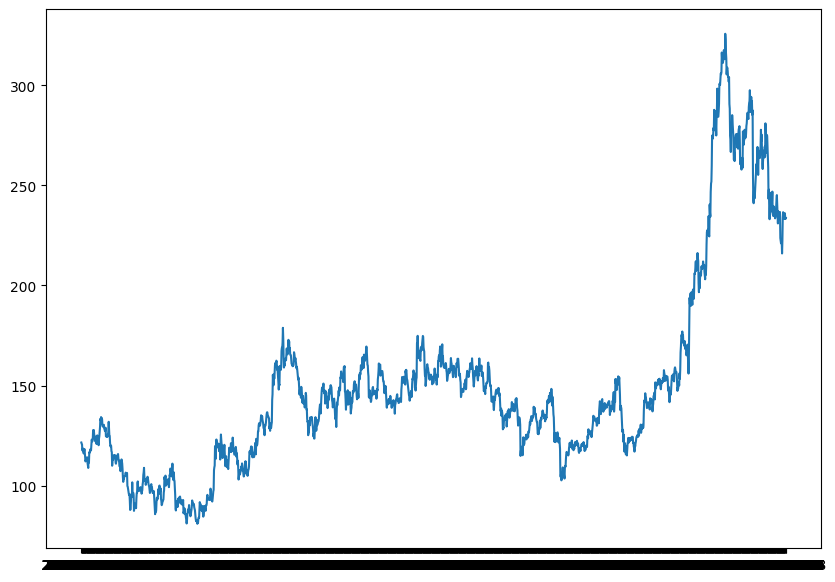

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(sort['Date'], sort['Close'])

In [ ]:
close_sort = sort['Close']
close_sort

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

**Features Scale(MinMax Scaler)**

In [ ]:
scaler = MinMaxScaler(feature_range =(0,1))
close_sort =scaler.fit_transform(np.array(close_sort).reshape(-1, 1))
close_sort

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

**Split Dataset**

In [ ]:
train_size = int (len(close_sort)*0.7)
test_size = len(close_sort)-train_size
train_data,test_data = close_sort[0:train_size,:], close_sort[train_size:len(close_sort),:1]

In [ ]:
train_data.shape

(1424, 1)

In [ ]:
test_data.shape

(611, 1)

**Convert an array of values intoa dataset matrix**

In [ ]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [],[]
  for  i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)


**Reshape of Dataset**

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
x_train

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.14011438],
        [0.13848039],
        [0.12479575]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.13848039],
        [0.12479575],
        [0.12254902]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.12479575],
        [0.12254902],
        [0.13010621]],

       ...,

       [[0.18280229],
        [0.19178922],
        [0.19219771],
        ...,
        [0.16441993],
        [0.15236928],
        [0.15482026]],

       [[0.19178922],
        [0.19219771],
        [0.19281046],
        ...,
        [0.15236928],
        [0.15482026],
        [0.15420752]],

       [[0.19219771],
        [0.19281046],
        [0.21058007],
        ...,
        [0.15482026],
        [0.15420752],
        [0.15012255]]])

**Create the Stacked LSTM Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

**Create LSTM model**

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100 , 1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss ='mean_squared_error',optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_8 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**Prediction and Checking Performance **

In [ ]:
model.fit(x_train, y_train, validation_split = 0.1, epochs =60, batch_size = 64, verbose=1)

Epoch 1/60
19/19 [==============================] - 5s 272ms/step - loss: 2.3477e-04 - val_loss: 2.0912e-04
Epoch 2/60
19/19 [==============================] - 4s 203ms/step - loss: 2.2875e-04 - val_loss: 2.4743e-04
Epoch 3/60
19/19 [==============================] - 4s 207ms/step - loss: 2.2170e-04 - val_loss: 2.0384e-04
Epoch 4/60
19/19 [==============================] - 5s 273ms/step - loss: 2.0910e-04 - val_loss: 1.8546e-04
Epoch 5/60
19/19 [==============================] - 4s 206ms/step - loss: 2.1230e-04 - val_loss: 2.0367e-04
Epoch 6/60
19/19 [==============================] - 4s 208ms/step - loss: 2.2630e-04 - val_loss: 1.8245e-04
Epoch 7/60
19/19 [==============================] - 5s 278ms/step - loss: 2.1552e-04 - val_loss: 1.9467e-04
Epoch 8/60
19/19 [==============================] - 4s 208ms/step - loss: 1.9299e-04 - val_loss: 2.0354e-04
Epoch 9/60
19/19 [==============================] - 7s 370ms/step - loss: 1.8215e-04 - val_loss: 1.5232e-04
Epoch 10/60
19/19 [=========

In [ ]:
train_predict = model.predict(x_train)
test_predict=model.predict(x_test)

16/16 [==============================] - 2s 93ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

**Calculate Performance**

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train, train_predict))

133.5300139049597

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

207.3358728584734

**Plot the graph with predicted train data, tes twith actual data**

In [ ]:
lool_back = 100

trainPredictPlot = np.empty_like(close_sort)
trainPredictPlot[:, :] =np.nan
trainPredictPlot[lool_back: len(train_predict)+ lool_back, :] = train_predict

In [ ]:
testPredictPlot = np.empty_like(close_sort)
testPredictPlot[:, :] =np.nan
testPredictPlot[len(train_predict) + (lool_back*2)+1:len(close_sort)-1, : ]  = test_predict

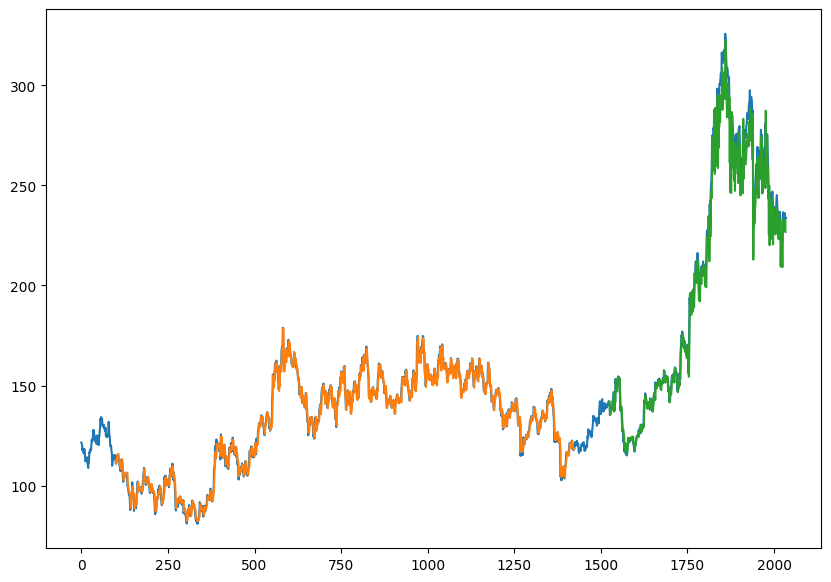

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(scaler.inverse_transform(close_sort))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Prediction For Next 30 days**

In [ ]:
len(test_data)

611

In [ ]:
pred_input = test_data[511:].reshape(1, -1)
pred_input.shape

(1, 100)

In [ ]:
temp_input = list(pred_input)
temp_input = temp_input[0].tolist()

In [ ]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [ ]:
lst_output = []
n_steps = 100
i = 0
while(i<30):

  if(len(temp_input)>100):
    pred_input = np.array(temp_input[1:])
    print("{}day Input".format(i,pred_input))
    pred_input = pred_input.reshape(1, -1)
    #pred_input = pred_input.reshape((1, n_steps, 1))

   # yhat = model.predict(pred_input, verbose = 0)
    print("{}dat output {}". format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

    lst_output.extend(yhat.tolist())
    i = i + 1
  else:
    pred_input = pred_input.reshape((1, n_steps, 1))
    yhat = model.predict(pred_input,verbose = 0)
    print(yhat[0])
    temp_input. extend(yhat[0]. tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i +1

print(lst_output)

0day Input
0dat output [[0.56665134]]
1day Input
1dat output [[0.56665134]]
2day Input
2dat output [[0.56665134]]
3day Input
3dat output [[0.56665134]]
4day Input
4dat output [[0.56665134]]
5day Input
5dat output [[0.56665134]]
6day Input
6dat output [[0.56665134]]
7day Input
7dat output [[0.56665134]]
8day Input
8dat output [[0.56665134]]
9day Input
9dat output [[0.56665134]]
10day Input
10dat output [[0.56665134]]
11day Input
11dat output [[0.56665134]]
12day Input
12dat output [[0.56665134]]
13day Input
13dat output [[0.56665134]]
14day Input
14dat output [[0.56665134]]
15day Input
15dat output [[0.56665134]]
16day Input
16dat output [[0.56665134]]
17day Input
17dat output [[0.56665134]]
18day Input
18dat output [[0.56665134]]
19day Input
19dat output [[0.56665134]]
20day Input
20dat output [[0.56665134]]
21day Input
21dat output [[0.56665134]]
22day Input
22dat output [[0.56665134]]
23day Input
23dat output [[0.56665134]]
24day Input
24dat output [[0.56665134]]
25day Input
25dat ou

**Plot last 130 days Closing Price **

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [ ]:
len(close_sort)

2035

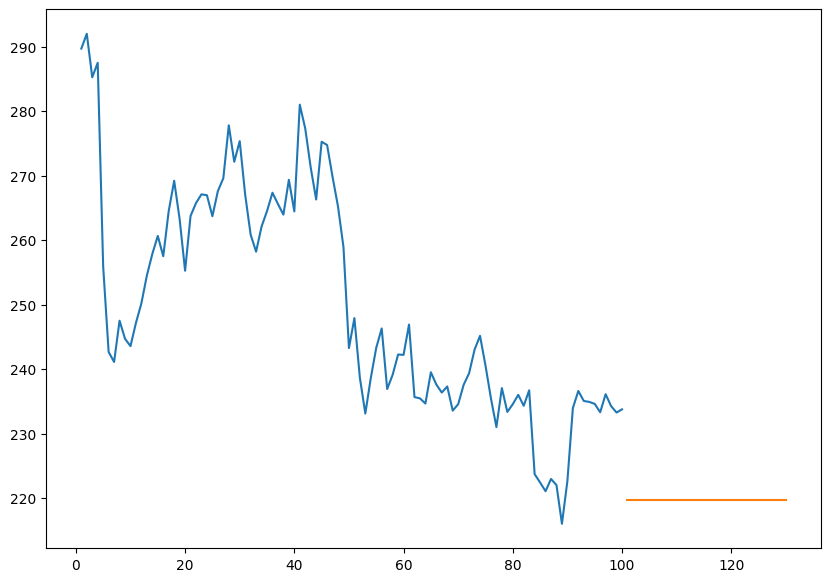

In [ ]:
plt.figure(figsize =(10, 7))
plt.plot(day_new, scaler.inverse_transform(close_sort[1935: ]))
plt.plot(day_pred,scaler. inverse_transform(lst_output))

**Append in a list is done to make continues graph**

In [ ]:
df3 = close_sort.tolist()

df3.extend(lst_output)

In [ ]:
print(len(df3))

2065


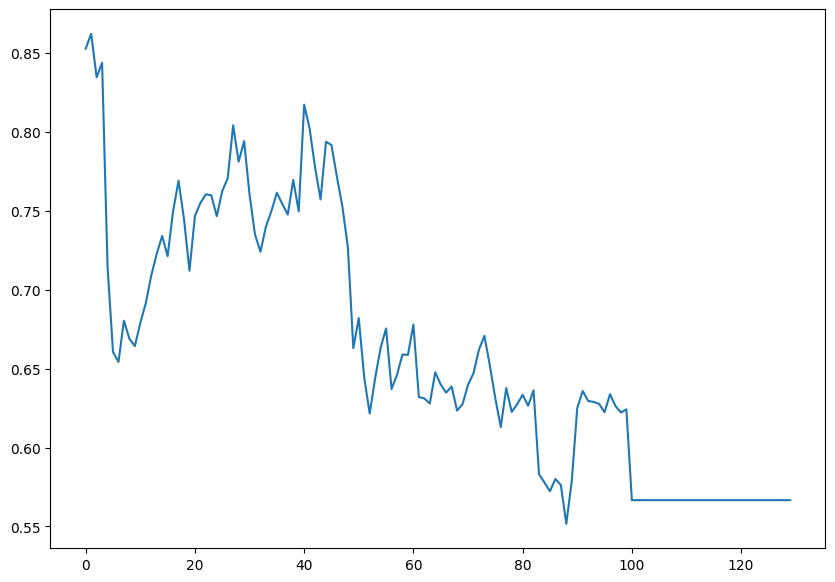

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df3[1935:])

**Plot The Graph with predicted 30 days output**

In [ ]:
df3 = scaler.inverse_transform(df3).tolist()

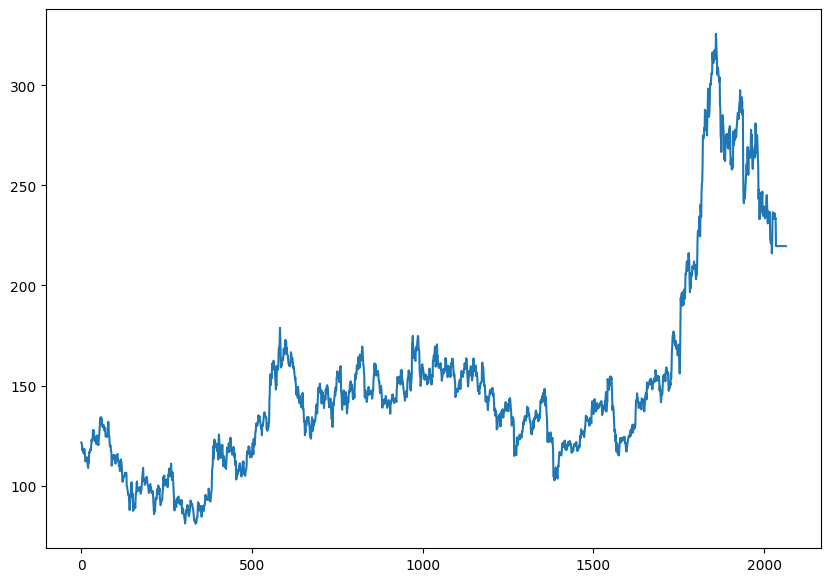

In [ ]:
plt.figure(figsize =(10, 7))
plt.plot(df3)